<a href="https://colab.research.google.com/github/imraunav/Computer-vision-EE511/blob/main/cv_convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import random_split
from tqdm import tqdm

In [34]:
# Download training data from open datasets.
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

Files already downloaded and verified
Files already downloaded and verified


In [35]:
train_size=int(0.8*len(training_data))
val_size=len(training_data)-train_size
train_dataset, val_dataset = random_split(training_data, [train_size, val_size])

In [36]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
test_dataloader=DataLoader(test_data,batch_size=batch_size)

for X, y in val_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 3, 32, 32])
Shape of y: torch.Size([64]) torch.int64


In [42]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=64,kernel_size=5,stride=1,padding='valid'),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=5, stride=1),
            nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,stride=1,padding='valid'),
            nn.MaxPool2d(kernel_size=3, stride=1),
            nn.LeakyReLU(),
            nn.Flatten(),
            nn.Linear(20*20*128, 10)
        )

    def forward(self, x):
        #x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

Using cuda device


In [43]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    batch_losses = []
    for batch in tqdm(dataloader):
        X, y = batch
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_losses.append(loss.item())

    return sum(batch_losses)/len(batch_losses)

In [44]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=valid)
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool2d(kernel_size=5, stride=1, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=valid)
    (4): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=51200, out_features=10, bias=True)
  )
)


In [45]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [46]:
max_epoch = 100

train_loss = []
for epoch in range(max_epoch):
  print(f"Epoch {epoch+1}")
  epoch_loss = train(train_dataloader,model,loss_fn,optimizer)
  print(f"Train loss: {epoch_loss}")
  train_loss.append(epoch_loss)

Epoch 1


100%|██████████| 625/625 [00:09<00:00, 63.80it/s]


Train loss: 1.4695164991378784
Epoch 2


100%|██████████| 625/625 [00:10<00:00, 59.33it/s]


Train loss: 1.1806938292503357
Epoch 3


100%|██████████| 625/625 [00:10<00:00, 58.93it/s]


Train loss: 1.0692393306732177
Epoch 4


100%|██████████| 625/625 [00:10<00:00, 60.18it/s]


Train loss: 0.9976458258628845
Epoch 5


100%|██████████| 625/625 [00:09<00:00, 64.96it/s]


Train loss: 0.9467027930259705
Epoch 6


100%|██████████| 625/625 [00:10<00:00, 59.66it/s]


Train loss: 0.8952792678833008
Epoch 7


100%|██████████| 625/625 [00:10<00:00, 59.06it/s]


Train loss: 0.856960669517517
Epoch 8


100%|██████████| 625/625 [00:10<00:00, 59.94it/s]


Train loss: 0.8162873708724976
Epoch 9


100%|██████████| 625/625 [00:09<00:00, 64.14it/s]


Train loss: 0.7856487741470337
Epoch 10


100%|██████████| 625/625 [00:10<00:00, 58.66it/s]


Train loss: 0.7507255431175232
Epoch 11


100%|██████████| 625/625 [00:10<00:00, 59.45it/s]


Train loss: 0.7132272970676422
Epoch 12


100%|██████████| 625/625 [00:10<00:00, 60.10it/s]


Train loss: 0.6811590510368347
Epoch 13


100%|██████████| 625/625 [00:09<00:00, 66.11it/s]


Train loss: 0.6379167970180512
Epoch 14


100%|██████████| 625/625 [00:10<00:00, 59.81it/s]


Train loss: 0.6122057332992553
Epoch 15


100%|██████████| 625/625 [00:10<00:00, 58.81it/s]


Train loss: 0.5892608868122101
Epoch 16


100%|██████████| 625/625 [00:10<00:00, 60.00it/s]


Train loss: 0.5527768914699555
Epoch 17


100%|██████████| 625/625 [00:09<00:00, 65.15it/s]


Train loss: 0.5415355545043945
Epoch 18


100%|██████████| 625/625 [00:10<00:00, 59.46it/s]


Train loss: 0.5109937949419021
Epoch 19


100%|██████████| 625/625 [00:10<00:00, 61.73it/s]


Train loss: 0.4858818101167679
Epoch 20


100%|██████████| 625/625 [00:09<00:00, 62.82it/s]


Train loss: 0.4679955808162689
Epoch 21


100%|██████████| 625/625 [00:10<00:00, 62.34it/s]


Train loss: 0.46172054266929624
Epoch 22


100%|██████████| 625/625 [00:09<00:00, 65.01it/s]


Train loss: 0.44118342130184174
Epoch 23


100%|██████████| 625/625 [00:10<00:00, 62.15it/s]


Train loss: 0.4265455959558487
Epoch 24


100%|██████████| 625/625 [00:10<00:00, 61.89it/s]


Train loss: 0.41425528450012206
Epoch 25


100%|██████████| 625/625 [00:09<00:00, 62.67it/s]


Train loss: 0.38591124020814893
Epoch 26


100%|██████████| 625/625 [00:09<00:00, 62.61it/s]


Train loss: 0.3795987649321556
Epoch 27


100%|██████████| 625/625 [00:09<00:00, 65.58it/s]


Train loss: 0.3784372464776039
Epoch 28


100%|██████████| 625/625 [00:09<00:00, 62.76it/s]


Train loss: 0.3523454314827919
Epoch 29


100%|██████████| 625/625 [00:10<00:00, 60.91it/s]


Train loss: 0.3436684875011444
Epoch 30


100%|██████████| 625/625 [00:10<00:00, 62.34it/s]


Train loss: 0.3255737927079201
Epoch 31


100%|██████████| 625/625 [00:10<00:00, 62.06it/s]


Train loss: 0.3054124819993973
Epoch 32


100%|██████████| 625/625 [00:09<00:00, 65.31it/s]


Train loss: 0.2966548260450363
Epoch 33


100%|██████████| 625/625 [00:09<00:00, 62.75it/s]


Train loss: 0.27580232004523275
Epoch 34


100%|██████████| 625/625 [00:09<00:00, 62.67it/s]


Train loss: 0.27915490697622297
Epoch 35


100%|██████████| 625/625 [00:09<00:00, 62.54it/s]


Train loss: 0.2755927657306194
Epoch 36


100%|██████████| 625/625 [00:09<00:00, 62.58it/s]


Train loss: 0.25446327686309816
Epoch 37


100%|██████████| 625/625 [00:09<00:00, 64.89it/s]


Train loss: 0.2506640255391598
Epoch 38


100%|██████████| 625/625 [00:09<00:00, 63.03it/s]


Train loss: 0.2525806621789932
Epoch 39


100%|██████████| 625/625 [00:10<00:00, 61.88it/s]


Train loss: 0.2459784826040268
Epoch 40


100%|██████████| 625/625 [00:09<00:00, 62.53it/s]


Train loss: 0.2289316032767296
Epoch 41


100%|██████████| 625/625 [00:09<00:00, 62.59it/s]


Train loss: 0.22726422355771064
Epoch 42


100%|██████████| 625/625 [00:09<00:00, 64.31it/s]


Train loss: 0.21483712400197982
Epoch 43


100%|██████████| 625/625 [00:09<00:00, 63.95it/s]


Train loss: 0.21927855635583401
Epoch 44


100%|██████████| 625/625 [00:09<00:00, 62.65it/s]


Train loss: 0.19718015672564507
Epoch 45


100%|██████████| 625/625 [00:09<00:00, 62.65it/s]


Train loss: 0.19225211692154406
Epoch 46


100%|██████████| 625/625 [00:09<00:00, 62.80it/s]


Train loss: 0.2053258664213121
Epoch 47


100%|██████████| 625/625 [00:09<00:00, 63.76it/s]


Train loss: 0.19428622489869596
Epoch 48


100%|██████████| 625/625 [00:09<00:00, 64.59it/s]


Train loss: 0.1769046632543206
Epoch 49


100%|██████████| 625/625 [00:10<00:00, 61.66it/s]


Train loss: 0.17452527922987937
Epoch 50


100%|██████████| 625/625 [00:09<00:00, 62.63it/s]


Train loss: 0.1927619642496109
Epoch 51


100%|██████████| 625/625 [00:09<00:00, 62.92it/s]


Train loss: 0.1749491835705936
Epoch 52


100%|██████████| 625/625 [00:09<00:00, 63.57it/s]


Train loss: 0.1602397485435009
Epoch 53


100%|██████████| 625/625 [00:09<00:00, 65.06it/s]


Train loss: 0.16715475400090218
Epoch 54


100%|██████████| 625/625 [00:09<00:00, 62.91it/s]


Train loss: 0.1592272016748786
Epoch 55


100%|██████████| 625/625 [00:09<00:00, 62.63it/s]


Train loss: 0.1776758420690894
Epoch 56


100%|██████████| 625/625 [00:09<00:00, 62.99it/s]


Train loss: 0.15692503024823964
Epoch 57


100%|██████████| 625/625 [00:09<00:00, 63.84it/s]


Train loss: 0.15256281052678825
Epoch 58


100%|██████████| 625/625 [00:09<00:00, 65.47it/s]


Train loss: 0.14540626949742436
Epoch 59


100%|██████████| 625/625 [00:09<00:00, 63.25it/s]


Train loss: 0.14447082853280008
Epoch 60


100%|██████████| 625/625 [00:09<00:00, 63.03it/s]


Train loss: 0.15355826321262867
Epoch 61


100%|██████████| 625/625 [00:09<00:00, 63.06it/s]


Train loss: 0.16128359190523625
Epoch 62


100%|██████████| 625/625 [00:09<00:00, 64.24it/s]


Train loss: 0.14162221297733485
Epoch 63


100%|██████████| 625/625 [00:09<00:00, 65.02it/s]


Train loss: 0.130482300581038
Epoch 64


100%|██████████| 625/625 [00:09<00:00, 62.55it/s]


Train loss: 0.1486219879835844
Epoch 65


100%|██████████| 625/625 [00:09<00:00, 63.23it/s]


Train loss: 0.15299666147604585
Epoch 66


100%|██████████| 625/625 [00:09<00:00, 64.39it/s]


Train loss: 0.1435041193779558
Epoch 67


100%|██████████| 625/625 [00:09<00:00, 62.90it/s]


Train loss: 0.14527702570836992
Epoch 68


100%|██████████| 625/625 [00:09<00:00, 66.55it/s]


Train loss: 0.1279742922719568
Epoch 69


100%|██████████| 625/625 [00:09<00:00, 62.70it/s]


Train loss: 0.14425409863367677
Epoch 70


100%|██████████| 625/625 [00:09<00:00, 63.15it/s]


Train loss: 0.13020607884526253
Epoch 71


100%|██████████| 625/625 [00:09<00:00, 62.79it/s]


Train loss: 0.14249811745509505
Epoch 72


100%|██████████| 625/625 [00:09<00:00, 62.97it/s]


Train loss: 0.14703043483728542
Epoch 73


100%|██████████| 625/625 [00:09<00:00, 67.00it/s]


Train loss: 0.13546276296824217
Epoch 74


100%|██████████| 625/625 [00:09<00:00, 62.96it/s]


Train loss: 0.13962383370371537
Epoch 75


100%|██████████| 625/625 [00:09<00:00, 63.22it/s]


Train loss: 0.14401669090483338
Epoch 76


100%|██████████| 625/625 [00:09<00:00, 62.95it/s]


Train loss: 0.12845088727232068
Epoch 77


100%|██████████| 625/625 [00:09<00:00, 63.06it/s]


Train loss: 0.13124944948330522
Epoch 78


100%|██████████| 625/625 [00:09<00:00, 66.74it/s]


Train loss: 0.1236308264490217
Epoch 79


100%|██████████| 625/625 [00:09<00:00, 63.07it/s]


Train loss: 0.1326637242220342
Epoch 80


100%|██████████| 625/625 [00:10<00:00, 62.42it/s]


Train loss: 0.1245861689094454
Epoch 81


100%|██████████| 625/625 [00:09<00:00, 63.28it/s]


Train loss: 0.127359835644532
Epoch 82


100%|██████████| 625/625 [00:09<00:00, 63.31it/s]


Train loss: 0.12808042576112785
Epoch 83


100%|██████████| 625/625 [00:09<00:00, 66.69it/s]


Train loss: 0.11897774048263672
Epoch 84


100%|██████████| 625/625 [00:09<00:00, 63.20it/s]


Train loss: 0.14377279682774097
Epoch 85


100%|██████████| 625/625 [00:09<00:00, 63.07it/s]


Train loss: 0.11495984807964414
Epoch 86


100%|██████████| 625/625 [00:09<00:00, 63.02it/s]


Train loss: 0.13025242946837098
Epoch 87


100%|██████████| 625/625 [00:09<00:00, 63.98it/s]


Train loss: 0.12066489546652884
Epoch 88


100%|██████████| 625/625 [00:09<00:00, 65.85it/s]


Train loss: 0.12033039794005454
Epoch 89


100%|██████████| 625/625 [00:10<00:00, 62.09it/s]


Train loss: 0.12572757725456613
Epoch 90


100%|██████████| 625/625 [00:09<00:00, 62.52it/s]


Train loss: 0.12090863831043243
Epoch 91


100%|██████████| 625/625 [00:09<00:00, 63.13it/s]


Train loss: 0.10502620076849126
Epoch 92


100%|██████████| 625/625 [00:09<00:00, 63.73it/s]


Train loss: 0.1189790845955722
Epoch 93


100%|██████████| 625/625 [00:09<00:00, 66.11it/s]


Train loss: 0.12760634071439272
Epoch 94


100%|██████████| 625/625 [00:09<00:00, 63.18it/s]


Train loss: 0.11788383234851062
Epoch 95


100%|██████████| 625/625 [00:09<00:00, 63.06it/s]


Train loss: 0.12585633059754037
Epoch 96


100%|██████████| 625/625 [00:10<00:00, 62.40it/s]


Train loss: 0.11618108047614806
Epoch 97


100%|██████████| 625/625 [00:09<00:00, 63.50it/s]


Train loss: 0.1153387796365918
Epoch 98


100%|██████████| 625/625 [00:09<00:00, 65.67it/s]


Train loss: 0.11671206726619275
Epoch 99


100%|██████████| 625/625 [00:09<00:00, 62.78it/s]


Train loss: 0.11670959245325066
Epoch 100


100%|██████████| 625/625 [00:09<00:00, 63.16it/s]

Train loss: 0.11336054809901398


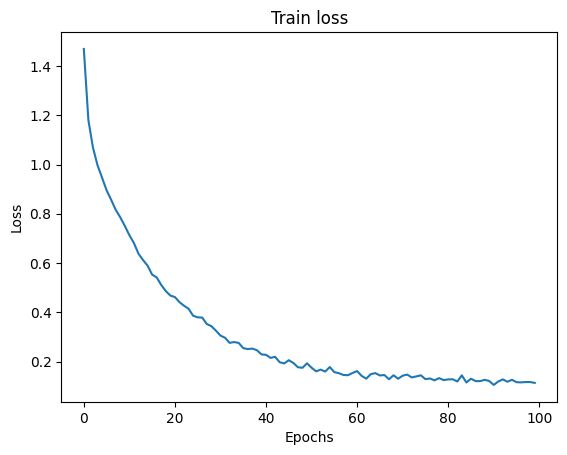

In [47]:
import matplotlib.pyplot as plt

plt.plot(train_loss)
plt.title("Train loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [48]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [49]:
test(test_dataloader,model,loss_fn)

Test Error: 
 Accuracy: 61.7%, Avg loss: 6.967105 

